In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data_banknote_authentication.csv

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/data_banknote_authentication.csv')
df.head(3) # Class = 0 (Real), Class = 1 (Fake)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [ ]:
# Check for Missing Data

df.isnull().sum() # Walang missing data

,0
Variance_Wavelet,0
Skewness_Wavelet,0
Curtosis_Wavelet,0
Image_Entropy,0
Class,0


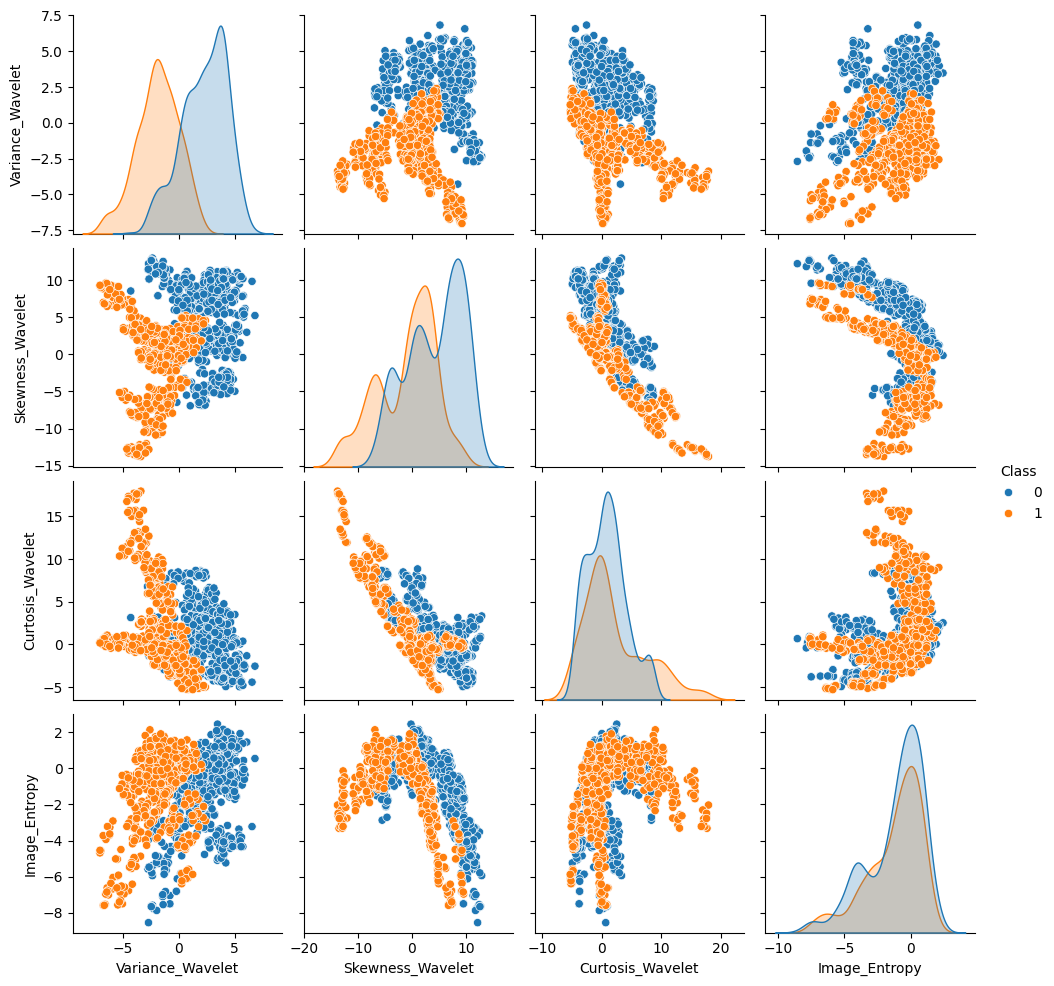

In [ ]:
# EDA by graphs

sns.pairplot(df, hue = 'Class')

In [ ]:
# Feature (X)

X = df.drop("Class", axis = 1) # Tanggalin ang Class in terms of columns (axis = 1)
X.head(1)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy
0,3.6216,8.6661,-2.8073,-0.44699


In [ ]:
# Feature (y)

y = df["Class"] # I-assign ang Class sa variable y
y.head(2)

,Class
0,0
1,0


In [ ]:
# Train-Test Split

from sklearn.model_selection import train_test_split

In [ ]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [ ]:
# Random Forest Import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
i_model = RandomForestClassifier(random_state = 101)
i_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [ ]:
i_predictions = i_model.predict(X_test)
i_predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,  i_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       165
           1       0.96      1.00      0.98       110

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
# Grid Search Import (Hyperparameter Optimization)

from sklearn.model_selection import GridSearchCV

In [ ]:
# Configuration Lists

n_estimators = [11, 25, 65, 101, 151, 201, 301, 401] # Ilang Decision Tree ang kailangan for Prediction (optimized)
max_features = [2,3]

In [ ]:
# Parameter Grids

param_grid = {'n_estimators': n_estimators, 'max_features': max_features}

In [ ]:
# GridSearch Proper

model = RandomForestClassifier(random_state = 101)
grid = GridSearchCV(model, param_grid)

In [ ]:
# GridSearch Fitting

grid.fit(X_train, y_train) # Eto ay fi-nit ang optimized configuration for RF via Grid Search

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_features': [3, 4],
                         'n_estimators': [25, 65, 101, 151, 201, 301]})

In [ ]:
# Identify Best Parameters

grid.best_params_ # Makikita mo na ang best hyperparameter for your RF model

{'max_features': 3, 'n_estimators': 101}

In [ ]:
# Feature Importance, Supply the best Parameters based on Grid Search and random_state = 101

model = RandomForestClassifier(bootstrap = True, max_features = 3, n_estimators = 101, random_state = 101)

model.fit(X_train, y_train)

importance = model.feature_importances_
feature_names = X.columns

pd.DataFrame(importance, feature_names, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Variance_Wavelet is the most important variable in prediction with 55.42% contribution

,Importance
Variance_Wavelet,0.609809
Skewness_Wavelet,0.210161
Curtosis_Wavelet,0.141605
Image_Entropy,0.038424


In [ ]:
# Sample Predictions

predictions = grid.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       165
           1       0.97      1.00      0.99       110

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



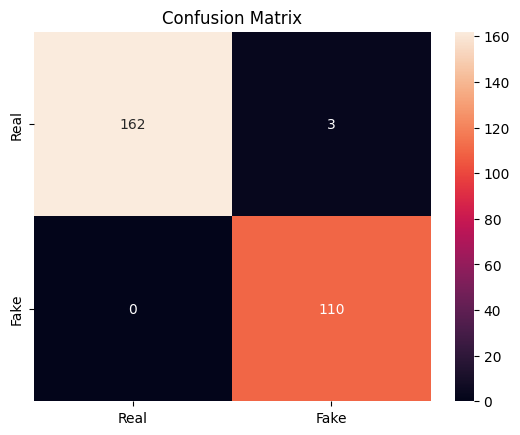

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd',
            xticklabels = ['Real', 'Fake'],
            yticklabels = ['Real', 'Fake']).set(title = 'Confusion Matrix')
plt.show()

In [ ]:
# Random Forest (Text Representation)

model = RandomForestClassifier(n_estimators = 101, max_features = 3, random_state = 101)
model.fit(X_train,y_train)

from sklearn import tree

for i in range(0, len(model.estimators_)):

  text_representation = tree.export_text(model.estimators_[i], feature_names=X.columns.tolist())
  print(f'Decision Tree No. {i} :')
  print(text_representation)

Decision Tree No. 0 :
|--- Variance_Wavelet <= 0.77
|   |--- Variance_Wavelet <= -0.40
|   |   |--- Image_Entropy <= -3.93
|   |   |   |--- Variance_Wavelet <= -2.79
|   |   |   |   |--- class: 1.0
|   |   |   |--- Variance_Wavelet >  -2.79
|   |   |   |   |--- class: 0.0
|   |   |--- Image_Entropy >  -3.93
|   |   |   |--- Skewness_Wavelet <= 5.70
|   |   |   |   |--- Curtosis_Wavelet <= 6.95
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Curtosis_Wavelet >  6.95
|   |   |   |   |   |--- Skewness_Wavelet <= -4.90
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Skewness_Wavelet >  -4.90
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- Skewness_Wavelet >  5.70
|   |   |   |   |--- Image_Entropy <= -3.63
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Image_Entropy >  -3.63
|   |   |   |   |   |--- Variance_Wavelet <= -5.08
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Variance_Wavelet >  -5.08
|   |   |   |   |   |   |--- cl

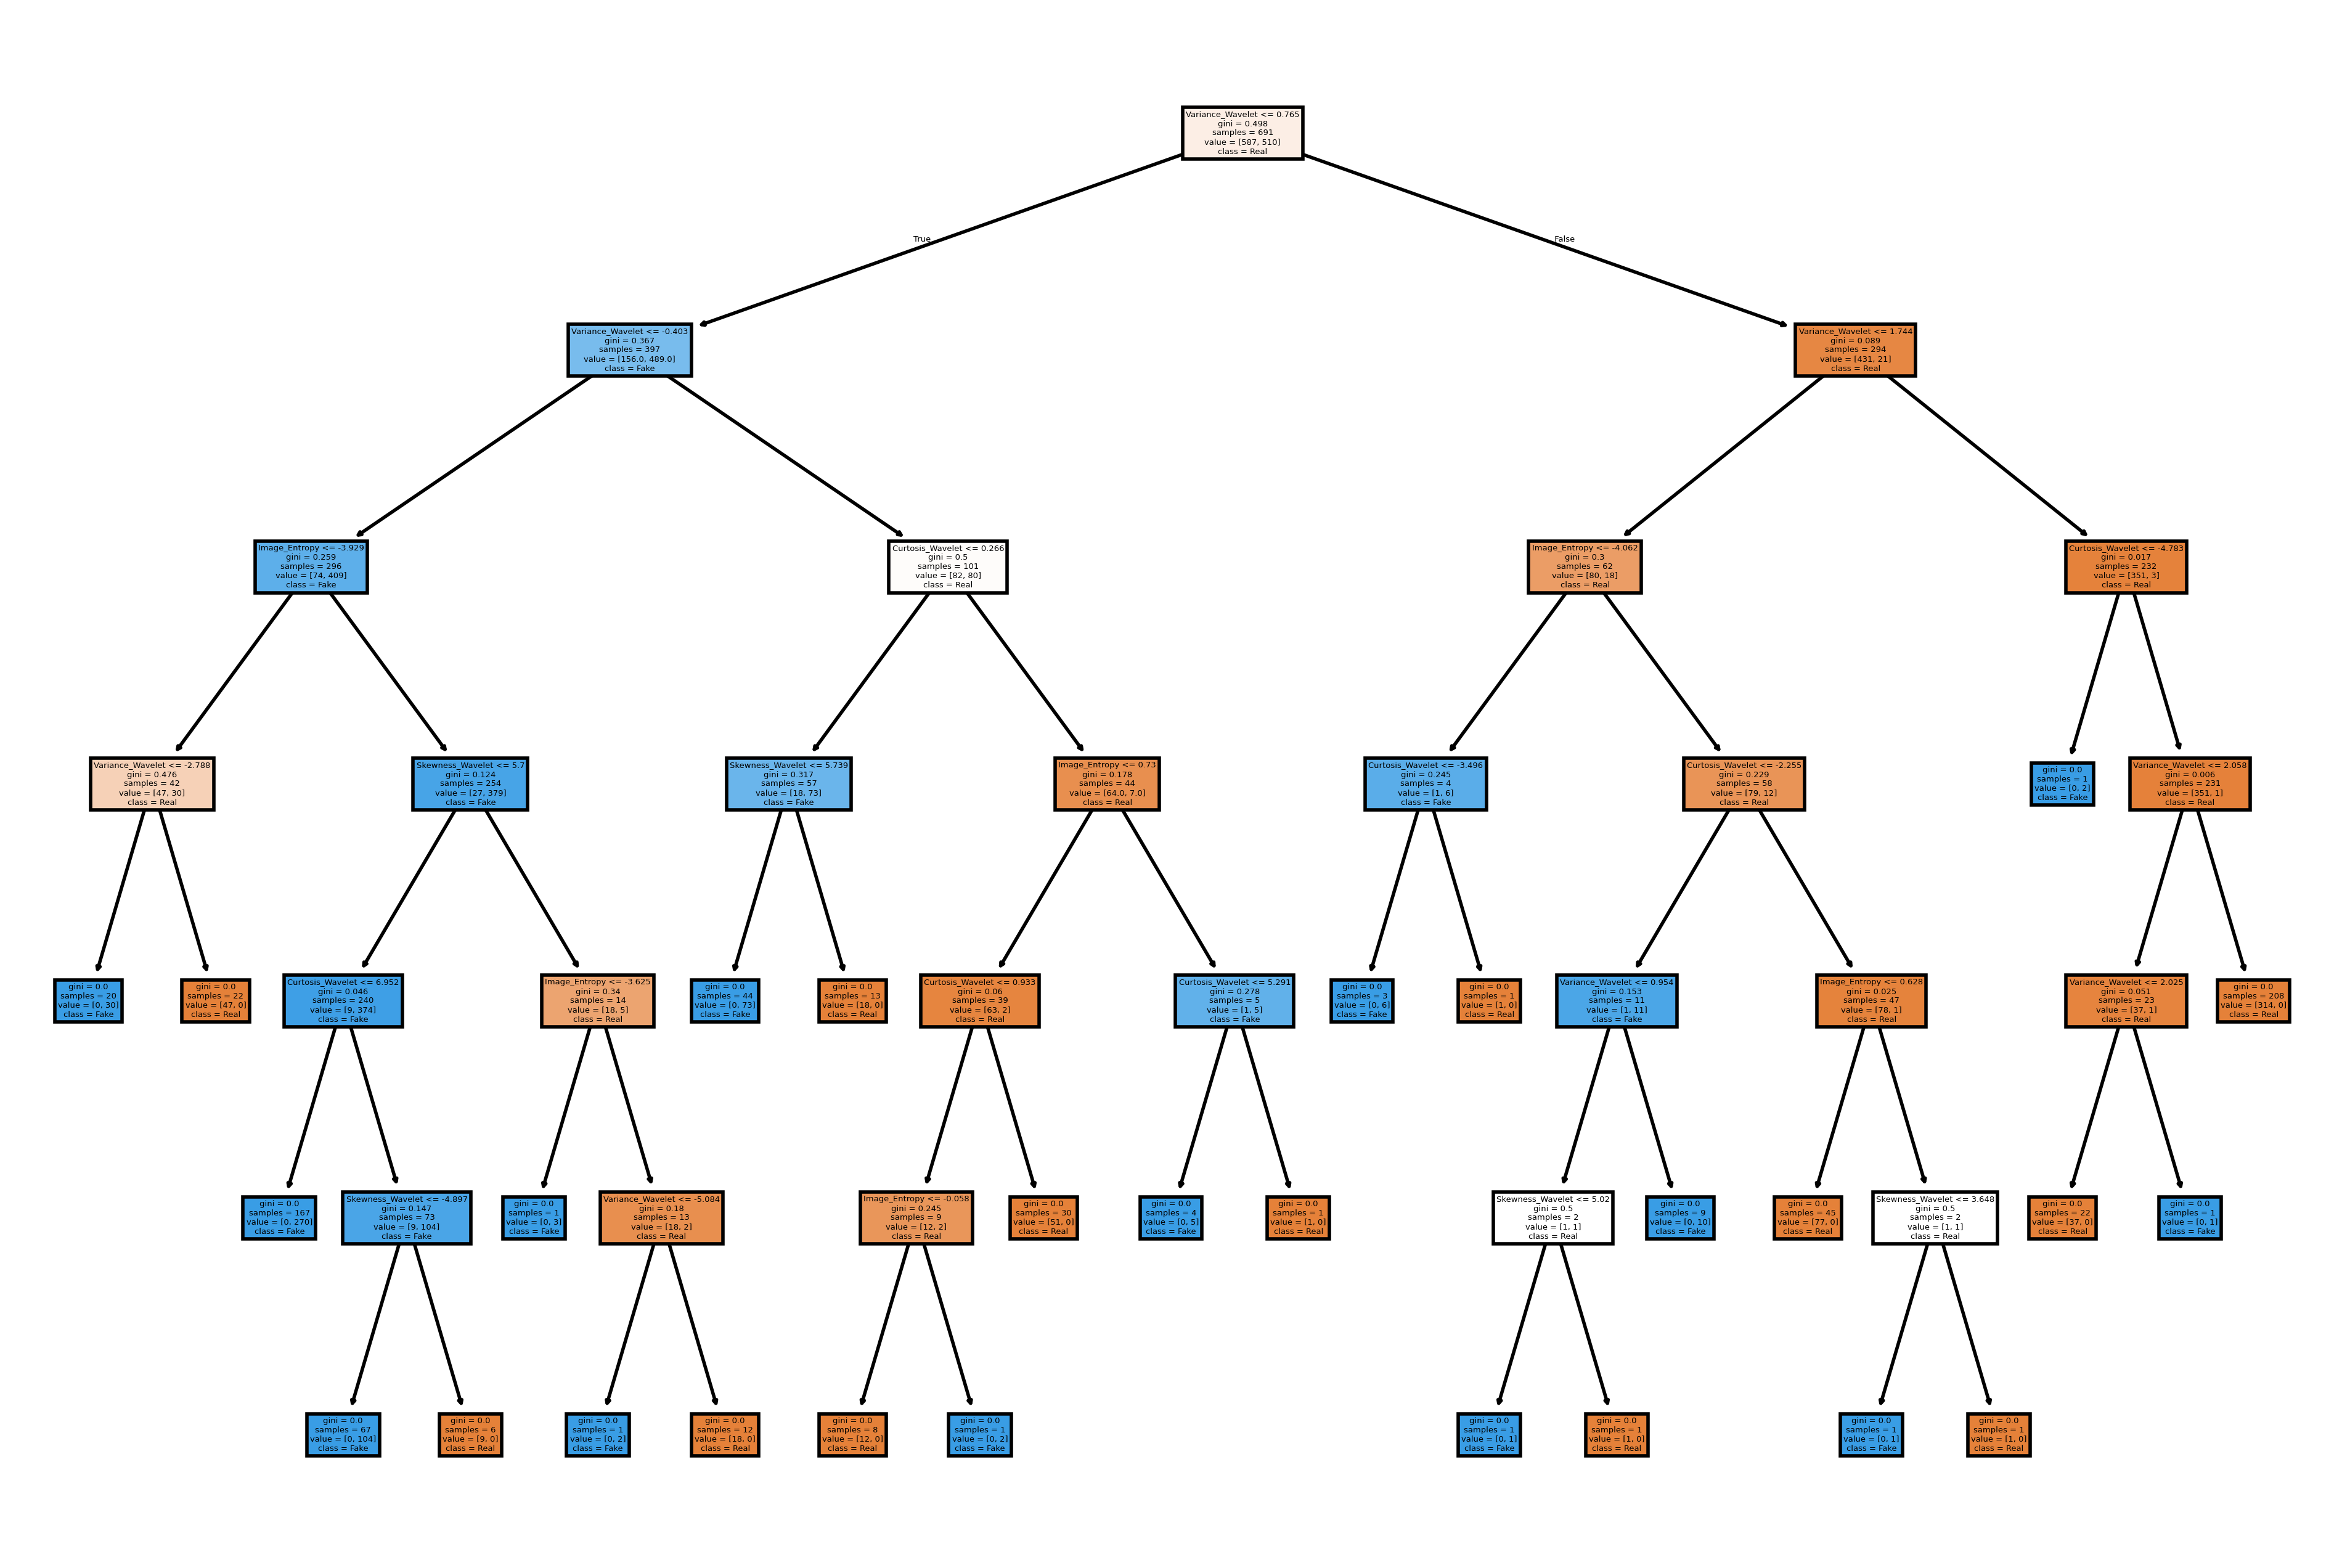

In [ ]:
# Tree Visualization (Graph)

from sklearn.tree import plot_tree # Implementation, left (true), right (false)

plt.figure(figsize = (12,8), dpi = 400)
plot_tree(model.estimators_[0], feature_names = X.columns, filled = True, class_names = ['Real', 'Fake']); # 0 - 63

In [ ]:
data = [[-1.8660,	5.6383,	-2.9242,	-0.10645],
        [-3.75030,	-13.45860,	17.5932,	-2.77710]]

v_data = pd.DataFrame(data, columns = X.columns)
v_data

new_pred = model.predict(v_data)
new_pred

array([0, 1])

In [ ]:
preds = pd.Series(new_pred, name = 'Class')
preds

,Class
0,0
1,1


In [ ]:
pd.concat([v_data, preds], axis = 1)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,-1.8660,5.6383,-2.9242,-0.10645,0
1,-3.7503,-13.4586,17.5932,-2.77710,1
